
# Importing data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
data=pd.read_csv("titanic-passengers.csv")

In [3]:
data.head()

,PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked
343;No;2;Collander,Mr. Erik Gustaf;male;28.0;0;0;248740;13.0;;S
76;No;3;Moen,Mr. Sigurd Hansen;male;25.0;0;0;348123;7.65;F...
641;No;3;Jensen,Mr. Hans Peder;male;20.0;0;0;350050;7.8542000...
568;No;3;Palsson,Mrs. Nils (Alma Cornelia Berglund);female;29....
672;No;1;Davidson,Mr. Thornton;male;31.0;1;0;F.C. 12750;52.0;B71;S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 343;No;2;Collander to 428;Yes;2;"Phillips
Data columns (total 1 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked  891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [5]:
data=pd.read_csv("titanic-passengers.csv",sep=';')

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


# Understanding Dataset

# Data cleaning and preprocessing

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [9]:
data.isnull().sum().sum()

866

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
(data.isnull().sum()/891)*100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
data.drop(columns="Cabin",inplace=True)

In [13]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [14]:
data['Age'].fillna(data.groupby('Sex')['Age'].transform('mean'),inplace=True)

In [15]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.736034,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.014897,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
list(data["SibSp"].unique())

[0, 1, 2, 3, 5, 4, 8]

In [17]:
list(data["Parch"].unique())

[0, 4, 2, 1, 5, 6, 3]

In [18]:
list(data["Embarked"].unique())

['S', 'C', 'Q']

# Data Visualization

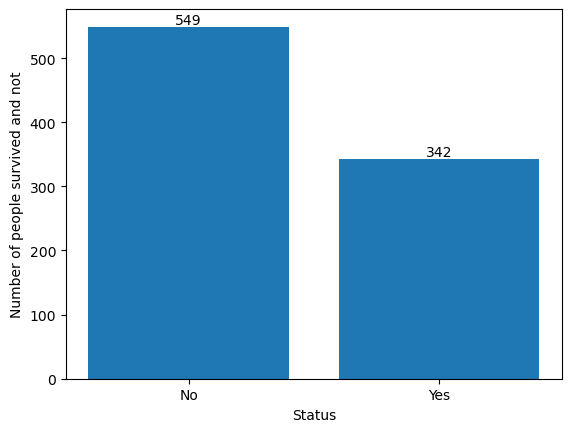

In [19]:
ns=data['Survived'].value_counts()
plt.bar(ns.index,ns.values)
plt.xlabel('Status')
plt.ylabel('Number of people survived and not')
for i,v in enumerate(ns):
    plt.text(i,v,v,ha='center',va='bottom')

([<matplotlib.axis.XTick at 0x213e3dd73d0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

<Figure size 640x480 with 0 Axes>

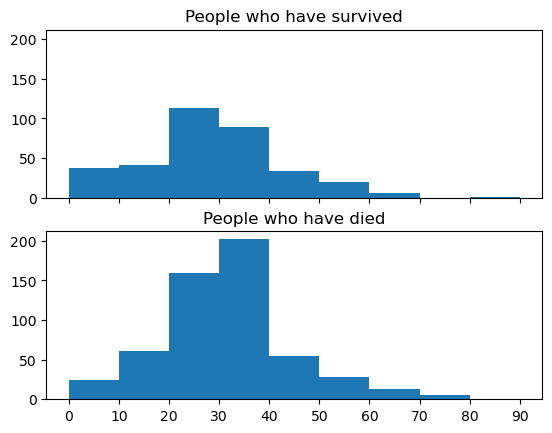

In [20]:
fig=plt.figure()

age1 = data.loc[data["Survived"] == 'Yes', 'Age']
age2 = data.loc[data["Survived"] == 'No', 'Age']
fig,axes=plt.subplots(2,1,sharex=True,sharey=True)
axes[0].hist(age1, np.arange(0,100,10))
axes[0].set_title("People who have survived")

axes[1].hist(age2, np.arange(0,100,10))
axes[1].set_title("People who have died")

plt.xticks(np.arange(0,100,10))


#plt.xticks(np.arange(0,100,10))"""




<Axes: xlabel='Pclass', ylabel='count'>

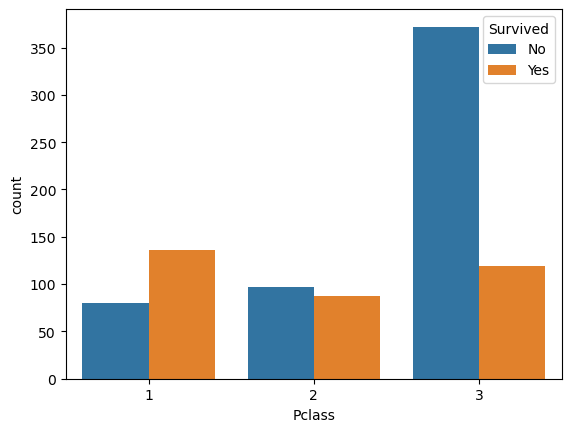

In [21]:
sns.countplot(x="Pclass",hue="Survived",data=data)

In [22]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
data_survived=data.loc[data["Survived"]=='Yes']

In [24]:
data_died=data.loc[data["Survived"]=='No']

In [25]:
counts_s=data_survived["Embarked"].value_counts()
counts_s

Embarked
S    219
C     93
Q     30
Name: count, dtype: int64

In [26]:
counts_d=data_died["Embarked"].value_counts()


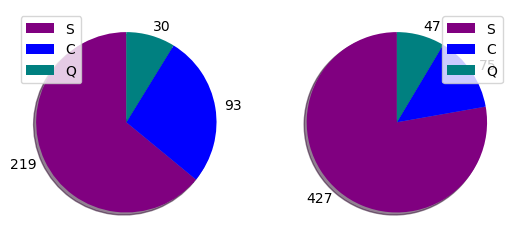

In [27]:
fig,axis=plt.subplots(nrows=1,ncols=2)

axis[0].pie(counts_s, startangle=90,labels=counts_s.values,colors=["purple", "blue", "teal"],shadow=True)
axis[1].pie(counts_d, startangle=90,labels=counts_d.values,colors=["purple", "blue", "teal"],shadow=True)

axis[0].legend(labels=counts_s.index,loc='upper left')
axis[1].legend(labels=counts_d.index,loc='upper right')
plt.show()

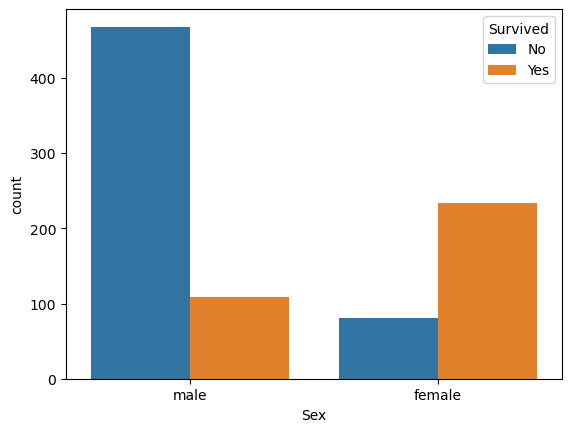

In [28]:
sns.countplot(x="Sex",hue="Survived",data=data)
plt.show()

In [29]:
data_fe_sur=data.loc[(data["Sex"]=="female")&(data["Survived"]=="Yes")]
data_fe_sur


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,C
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,S
12,755,Yes,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.000000,1,2,220845,65.0000,S
20,83,Yes,3,"McDermott, Miss. Brigdet Delia",female,27.915709,0,0,330932,7.7875,Q
24,273,Yes,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.000000,0,1,250644,19.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
879,275,Yes,3,"Healy, Miss. Hanora ""Nora""",female,27.915709,0,0,370375,7.7500,Q
880,360,Yes,3,"Mockler, Miss. Helen Mary ""Ellie""",female,27.915709,0,0,330980,7.8792,Q
882,775,Yes,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,29105,23.0000,S
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


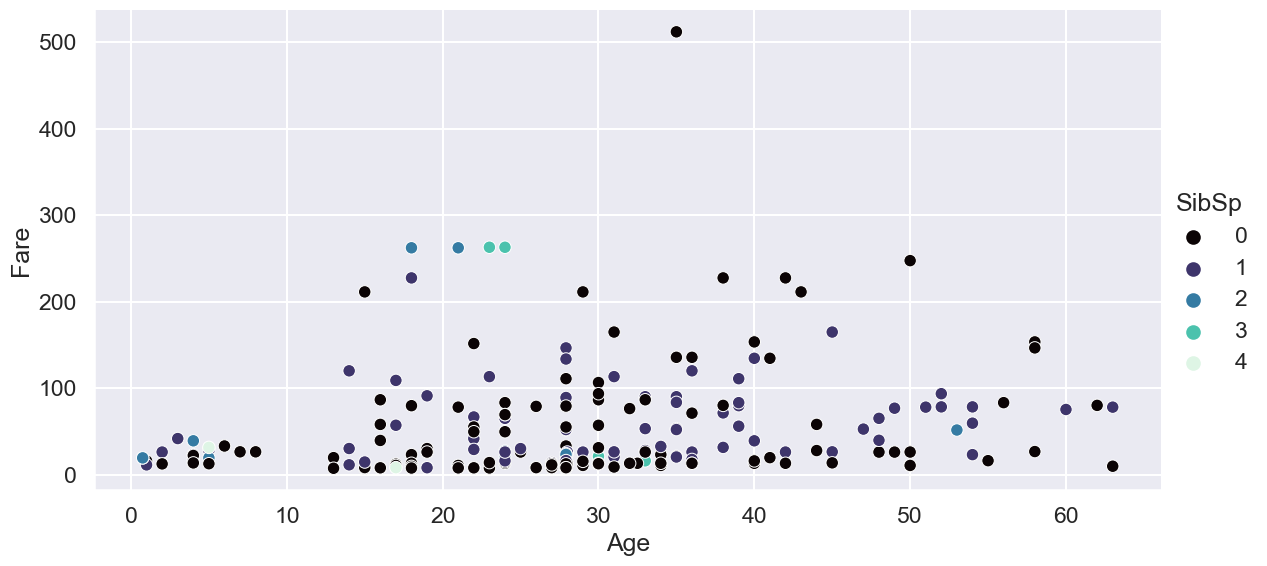

In [30]:
sns.set()
sns.set_context("talk")
sns.relplot(x="Age",y="Fare",hue="SibSp",data = data_fe_sur,height=6,aspect=2,palette='mako')

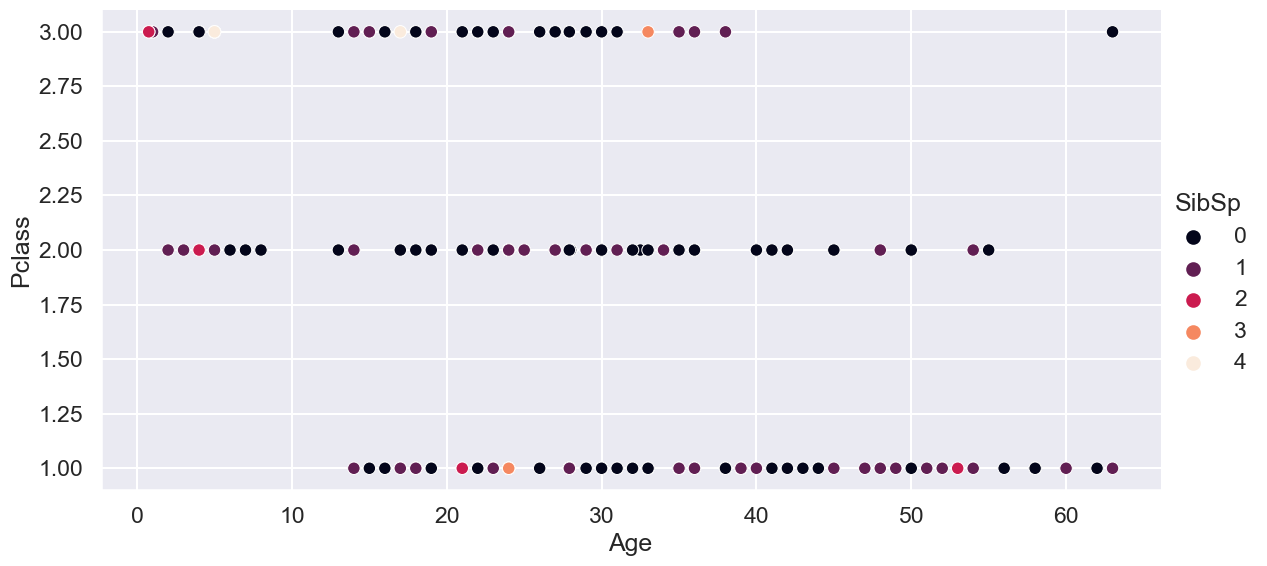

In [31]:
sns.set()
sns.set_context("talk")
sns.relplot(x="Age",y="Pclass",hue="SibSp",data = data_fe_sur,height=6,aspect=2,palette='rocket')

In [32]:
data_mal_de=data.loc[(data["Sex"]=="male")&(data["Survived"]=="No")]
data_mal_de

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,S
...,...,...,...,...,...,...,...,...,...,...,...
883,809,No,2,"Meyer, Mr. August",male,39.000000,0,0,248723,13.0000,S
884,278,No,2,"Parkes, Mr. Francis ""Frank""",male,30.726645,0,0,239853,0.0000,S
885,150,No,2,"Byles, Rev. Thomas Roussel Davids",male,42.000000,0,0,244310,13.0000,S
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C


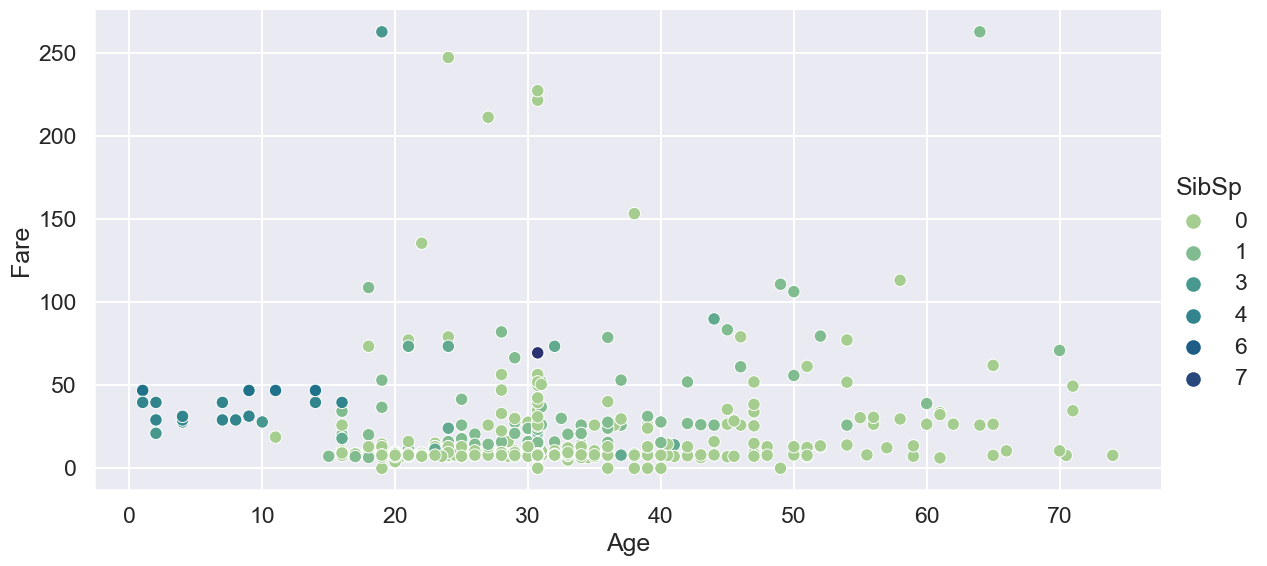

In [33]:
sns.set()
sns.set_context("talk")
sns.relplot(x="Age",y="Fare",hue="SibSp",data = data_mal_de,height=6,aspect=2,palette='crest')

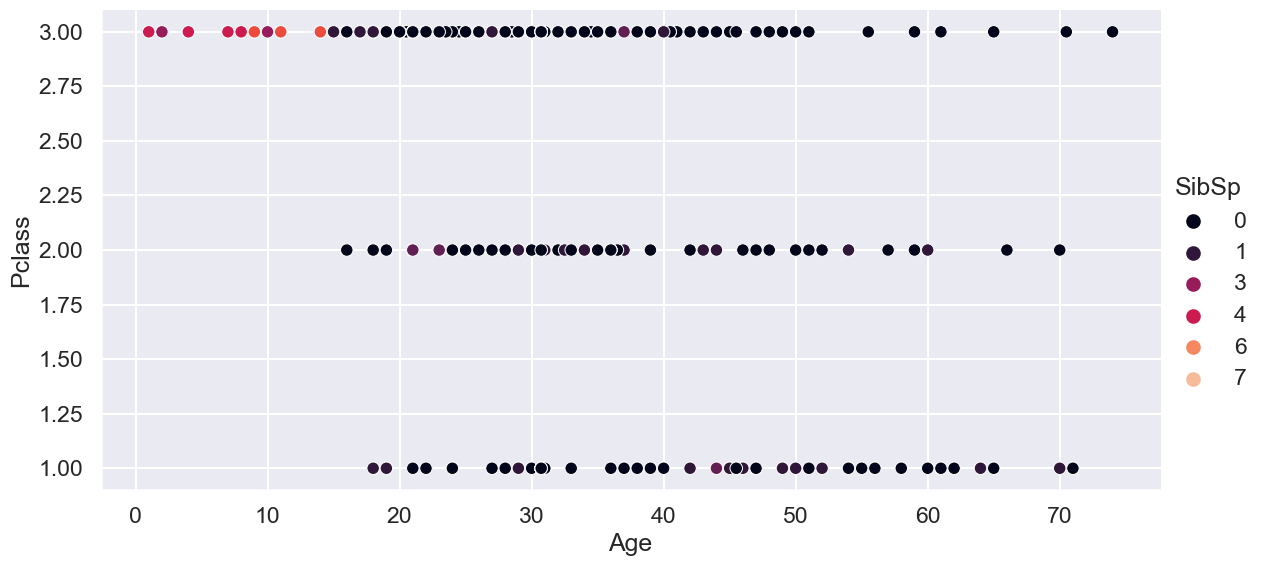

In [34]:
sns.set()
sns.set_context("talk")
sns.relplot(x="Age",y="Pclass",hue="SibSp",data = data_mal_de,height=6,aspect=2,palette='rocket')

In [35]:
encoder=LabelEncoder()
data["Survived"]=encoder.fit_transform(data["Survived"])

In [36]:
data["Embarked"]=encoder.fit_transform(data["Embarked"])

In [37]:
data["Sex"]=encoder.fit_transform(data["Sex"])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.726645,0,0,349215,7.8958,2


SUPERVISED MACHINE LEARNING MODELS ( CLASSIFICATION)

LOGISTIC REGRESSION

In [38]:
x=data[['Pclass','Age','Sex','SibSp','Parch','Fare','Embarked']]
y=data['Survived']

In [39]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(penalty='l2',C=1.0,solver='lbfgs',max_iter=100,random_state=33)

In [40]:
from sklearn.feature_selection import SelectKBest,f_classif
sel_feat=SelectKBest(score_func=f_classif,k=5)
x=sel_feat.fit_transform(x,y)
x.shape

sel_feat.get_support()


array([ True, False,  True, False,  True,  True,  True])

In [41]:
#x=data[['Pclass','Sex','Parch','Fare','Embarked']]

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [44]:
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
print("LogisticRegression model train score is:",logreg.score(x_train,y_train))
print("LogisticRegression model test score is:",logreg.score(x_test,y_test))
print("LogisticRegression model classes:",logreg.classes_)
print("LogisticRegression model number of iterations is:",logreg.n_iter_)

LogisticRegression model train score is: 0.7936241610738255
LogisticRegression model test score is: 0.7830508474576271
LogisticRegression model classes: [0 1]
LogisticRegression model number of iterations is: [9]


In [47]:

y_pred_prob=logreg.predict_proba(x_test)
print("predicted values for logiticregression are:",y_pred)
print("prediction probabilities values for logiticregression are:",y_pred_prob)

predicted values for logiticregression are: [0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0]
prediction probabilities values for logiticregression are: [[0.80801819 0.19198181]
 [0.31835161 0.68164839]
 [0.38489369 0.61510631]
 [0.86706631 0.13293369]
 [0.18227705 0.81772295]
 [0.8971335  0.1028665 ]
 [0.89726042 0.10273958]
 [0.91512192 0.08487808]
 [0.89726042 0.10273958]
 [0.1320678  0.8679322 ]
 [0.06612766 0.93387234]
 [0.66502394 0.33497606

In [48]:
CM=confusion_matrix(y_test,y_pred)
print("Confusion matrix:",CM)

Confusion matrix: [[149  30]
 [ 34  82]]


In [49]:
accuracyscore=accuracy_score(y_test,y_pred,normalize=True)
f1score=f1_score(y_test,y_pred,average='micro')
recallscore=recall_score(y_test,y_pred,average='micro')
precisionscore=precision_score(y_test,y_pred,average='micro')
precisionrecallscore=precision_recall_fscore_support(y_test,y_pred,average='micro')
ClassificationReport=classification_report(y_test,y_pred)

print("Classification Report:",ClassificationReport)
print("Accuracy score:",accuracyscore)
print("F1 score:",f1score)
print("Recall score:",recallscore)
print("Precision score:",precisionscore)
print("Precision recall score:",precisionrecallscore)

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.83      0.82       179
           1       0.73      0.71      0.72       116

    accuracy                           0.78       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.78      0.78      0.78       295

Accuracy score: 0.7830508474576271
F1 score: 0.7830508474576271
Recall score: 0.7830508474576271
Precision score: 0.7830508474576271
Precision recall score: (0.7830508474576271, 0.7830508474576271, 0.7830508474576271, None)


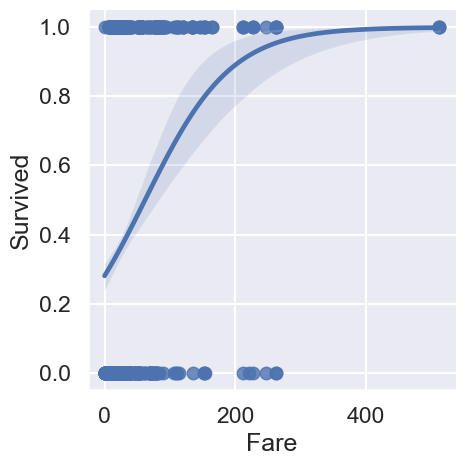

In [50]:
sns.lmplot(x="Fare",y="Survived",data=data,logistic=True)

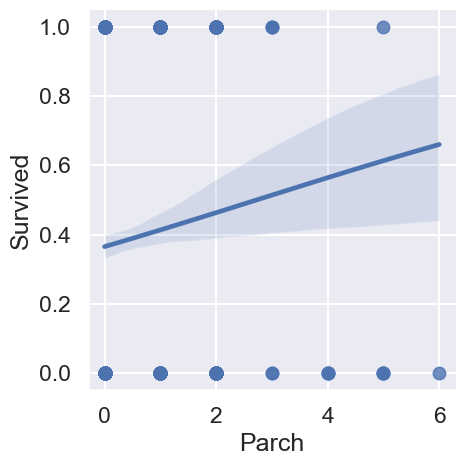

In [51]:
sns.lmplot(x="Parch",y="Survived",data=data,logistic=True)

DECISION TREE

In [52]:
from sklearn import tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
mtree=DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=3,min_samples_leaf=1,max_depth=3)
mtree.fit(x_train,y_train)
y_pred_tree=mtree.predict(x_test)


In [54]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,y_pred_tree)
acc_score

0.7694915254237288

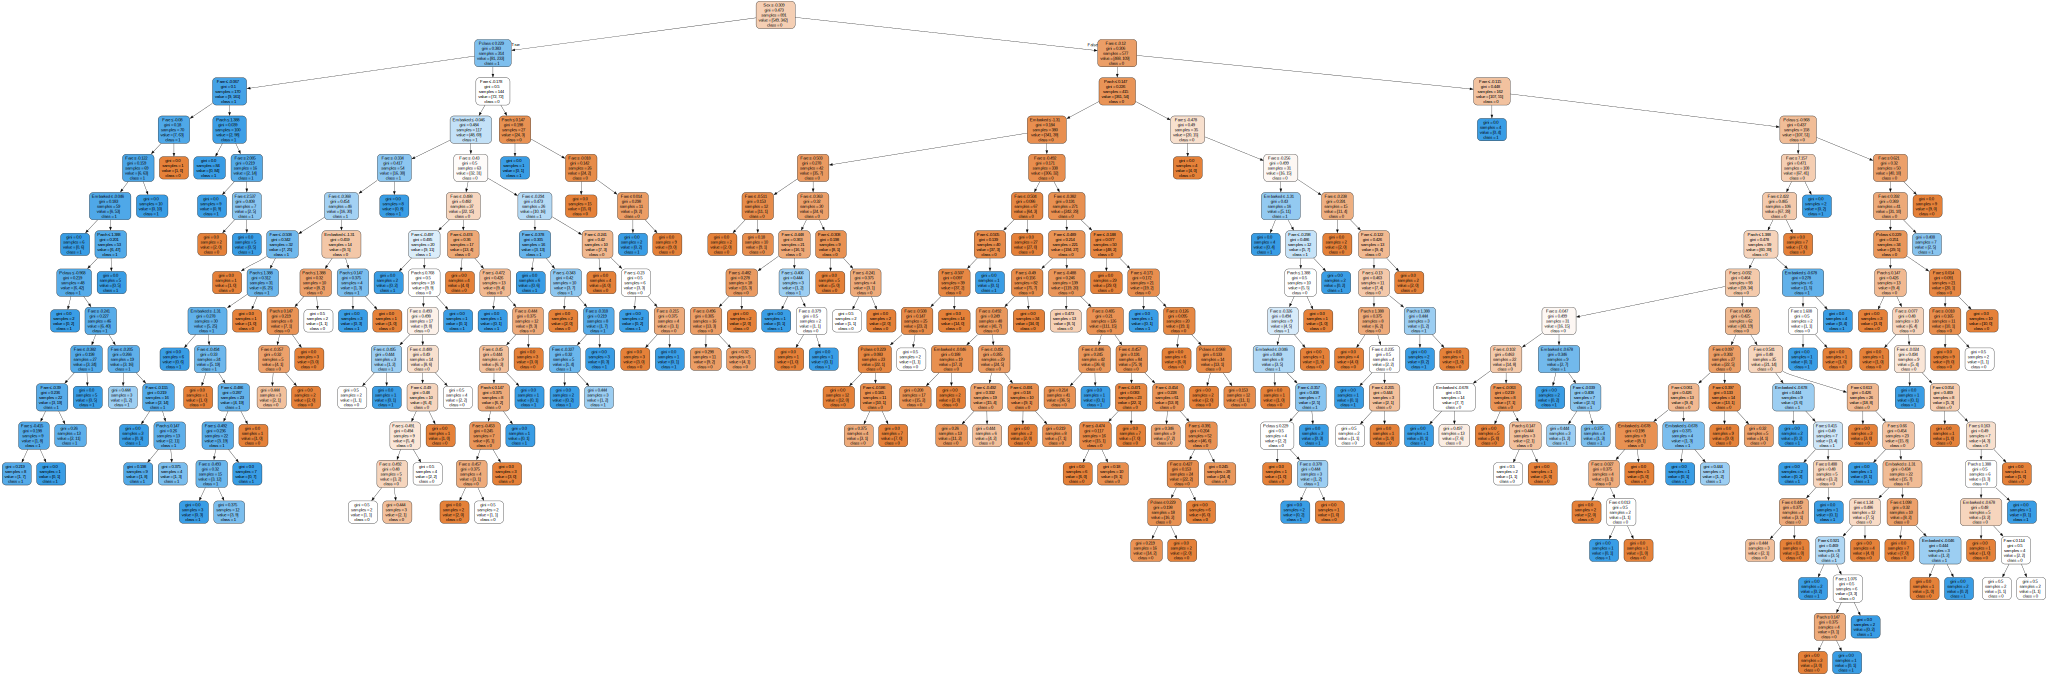

In [55]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz

mtree = DecisionTreeClassifier()
mtree.fit(x,y)
dot_data = tree.export_graphviz(mtree, 
                  feature_names=['Pclass','Sex','Parch','Fare','Embarked'],
                  class_names=['0','1'],  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None)

graph = graphviz.Source(dot_data)
graph


In [56]:
graph.format = "png"
graph.render("file_name")

'file_name.png'

Random Forest

In [57]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10)


In [58]:
classifier.fit(x_train,y_train)
y_pred_clf=classifier.predict(x_test)
y_pred_clf_prob=classifier.predict_proba(x_test)


In [59]:
accuracy_score(y_test,y_pred_clf)

0.7898305084745763

In [60]:
x=data[["Pclass","Sex","Age","SibSp","Parch","Embarked"]]
y=data["Survived"]

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [62]:
from sklearn import svm
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)
y_pred_svm=classifier.predict(x_test)

In [63]:
from sklearn import metrics
acc_score=metrics.accuracy_score(y_test,y_pred_svm)
acc_score

0.7830508474576271

In [64]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,y_pred_svm)
cfm

array([[150,  29],
       [ 35,  81]], dtype=int64)

<Axes: >

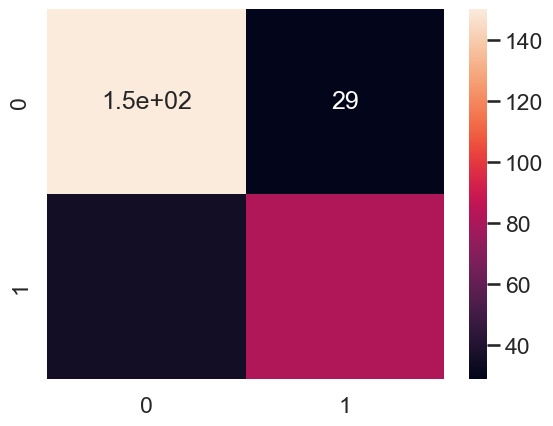

In [65]:
sns.heatmap(cfm,annot=True)

In [66]:
!pip install xgboost

In [67]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=33)


In [69]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth= 3)
model.fit(x_train, y_train)




y_pred = model.predict(x_test)


In [70]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8161434977578476

In [71]:
from xgboost import plot_tree


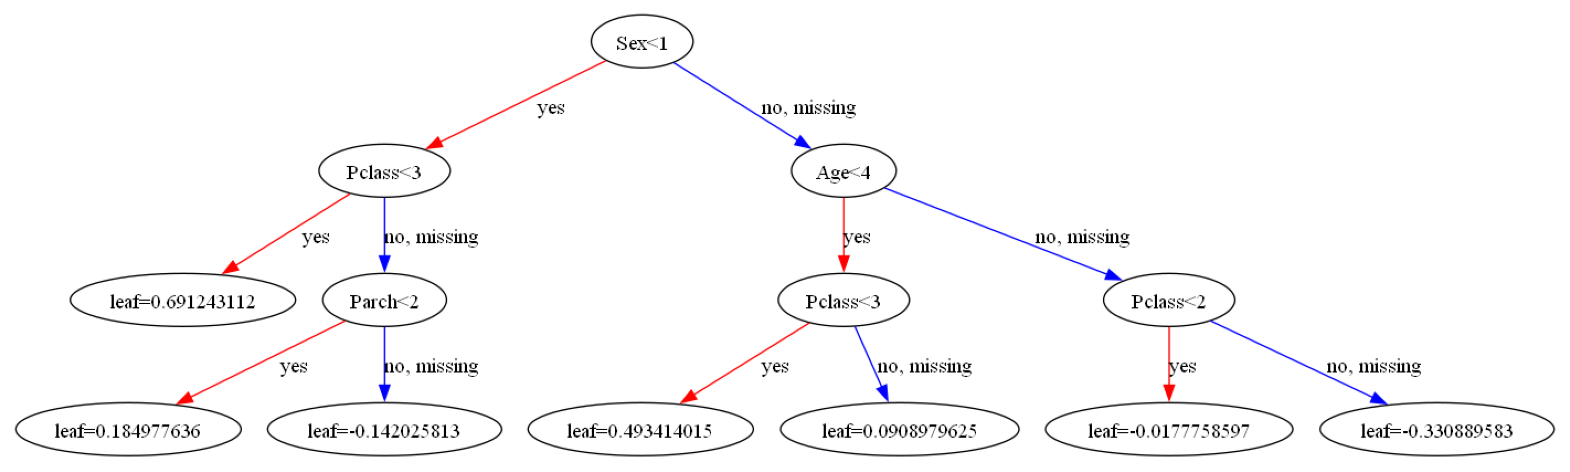

In [72]:
fig, ax = plt.subplots(figsize=(20, 30))
plot_tree(model, ax=ax)
plt.show()

In [73]:
import pickle

In [75]:
filename="titanic.sav"
pickle.dump(classifier,open(filename,'wb'))